## Titanic - Machine Learning from Disaster
The aim of the competition is using machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable.

#### Metric
Your score is the percentage of passengers you correctly predict. This is known as accuracy.

#### Data Dictionary
Variable Definition Key

survival - Survival 0 = No, 1 = Yes

pclass - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sex - Sex

Age - Age in years

sibsp - # of siblings / spouses aboard the Titanic

parch - # of parents / children aboard the Titanic

ticket - Ticket number

fare - Passenger fare

cabin - Cabin number

embarked - Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### first step is importing our data
our dataset was obtained from kaggle: https://www.kaggle.com/c/titanic/data

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("train.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:ylabel='Frequency'>

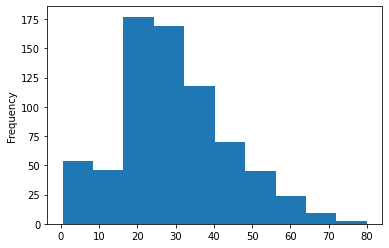

In [7]:
df_train.Age.plot.hist()

In [10]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
pd.crosstab(df_train.Survived,df_train.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Survived'>

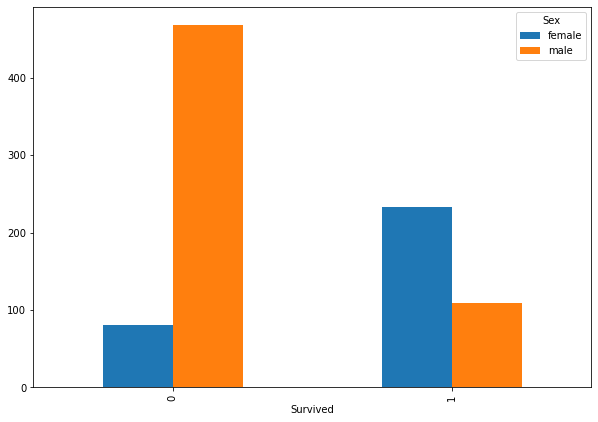

In [12]:
pd.crosstab(df_train.Survived,df_train.Sex).plot(kind="bar",figsize=(10,7))

<AxesSubplot:xlabel='Survived'>

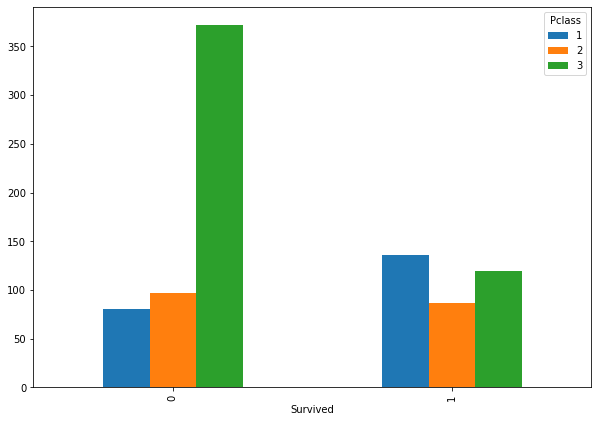

In [13]:
pd.crosstab(df_train.Survived,df_train.Pclass).plot(kind="bar",figsize=(10,7))

Text(0.5, 1.0, 'Siblings and spouse')

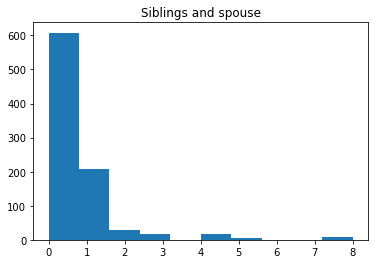

In [22]:
plt.hist(df_train["SibSp"]);
plt.title("Siblings & spouse")

Text(0.5, 1.0, 'Parents & children')

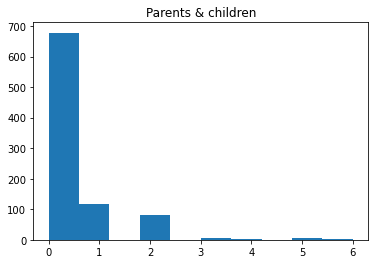

In [23]:
plt.hist(df_train["Parch"]);
plt.title("Parents & children")

Text(0.5, 1.0, 'Fare')

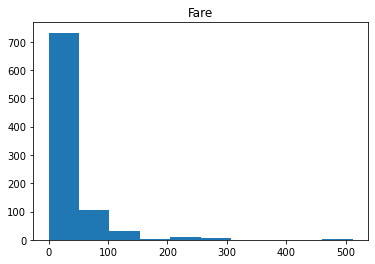

In [24]:
plt.hist(df_train["Fare"]);
plt.title("Fare")

In [27]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
df_train.Age=df_train.Age.fillna(df_train.Age.mean()).astype(int)

In [37]:
df_train.Sex=pd.get_dummies(df_train.Sex)

In [38]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C148,C


In [40]:
features=["Pclass","Sex","Age","Parch","SibSp"]

In [41]:
X=df_train[features]
y=df_train.Survived

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [44]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2)

In [45]:
model=RandomForestClassifier()

In [47]:
X.shape

(891, 5)

In [48]:
y.shape

(891,)

In [46]:
model.fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [712, 179]